# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
df = pd.read_csv("craftcans.csv", na_values = ["Does not apply", "nan"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
print("There are", df.shape[0], "rows in the data.")
df.info()

There are 2416 rows in the data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
df["Brewery"].value_counts().head(10).reset_index()

,Brewery,count
0,Brewery Vivant,62
1,Oskar Blues Brewery,46
2,Sun King Brewing Company,38
3,Cigar City Brewing Company,25
4,Sixpoint Craft Ales,24
5,Hopworks Urban Brewery,23
6,Stevens Point Brewery,22
7,Great Crescent Brewery,20
8,21st Amendment Brewery,20
9,Bonfire Brewing Company,19


## What is the most common ABV? (alcohol by volume)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [6]:
df["ABV"]

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [7]:
df["ABV"] = df["ABV"].str.replace("%", "")

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [8]:
df["ABV"] = df["ABV"].str.replace("%", "").astype(float)
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [9]:
meanabv = round(df["ABV"].mean(),1)
meanabv

6.0

In [10]:
medianabv = df["ABV"].median()
medianabv

5.6

Text(0, 0.5, 'Frequency')

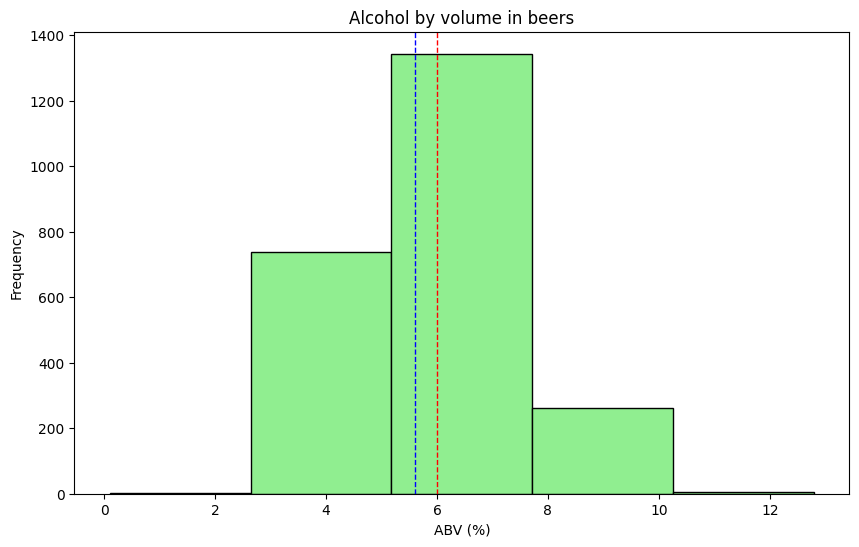

In [11]:
plt.figure(figsize = (10, 6))

plt.hist(df["ABV"], 
         bins = 5,
         color = "lightgreen", 
         edgecolor = "black")

plt.axvline(meanabv, color = "red", linestyle = "dashed", linewidth = 1)
plt.axvline(medianabv, color = "blue", linestyle = "dashed", linewidth = 1)
plt.title("Alcohol by volume in beers")
plt.xlabel("ABV (%)")
plt.ylabel("Frequency")

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [12]:
# df["ABV"].isnull().value_counts()
df["ABV"].isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [13]:
df["Location"].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [14]:
df_brook = df[df["Location"] == "Brooklyn, NY"]
df_brook.head()
#df_brook.shape

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [15]:
topbrew = df_brook["Brewery"].value_counts().reset_index()
topbrew.iloc[0]

# Is this by style??

Brewery    Sixpoint Craft Ales
count                       24
Name: 0, dtype: object

## What are the five most common styles of beer produced by Sixpoint?

In [16]:
sixpoint = df_brook[df_brook["Brewery"] == "Sixpoint Craft Ales"]
sixpoint["Style"].value_counts().head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [17]:
df["State"] = df["Location"].str[-2:]

nybrew = df[df["State"] == "NY"]["Brewery"].unique()
nybrew

print("Breweries in New York state:")
for brewery in nybrew:
    print(brewery)

Breweries in New York state:
Sixpoint Craft Ales
Evil Twin Brewing
Chatham Brewing
Newburgh Brewing Company
Southampton Publick House
Montauk Brewing Company
Matt Brewing Company
The Bronx Brewery
KelSo Beer Company
Brooklyn Brewery
The Manhattan Brewing Company
Blue Point Brewing Company
Bomb Beer Company
Dundee Brewing Company
Upstate Brewing Company
Butternuts Beer and Ale


### Now *count* all of the breweries in New York state

In [18]:
df[df["State"] == "NY"]["Brewery"].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [19]:
ipas = df[df["Style"].str.contains("IPA", case = False, na = False)]
ipas["Style"]

0                         American IPA
6       American Double / Imperial IPA
14      American Double / Imperial IPA
17                        American IPA
24      American Double / Imperial IPA
                     ...              
2403    American Double / Imperial IPA
2406                      American IPA
2408                      American IPA
2412    American Double / Imperial IPA
2414    American Double / Imperial IPA
Name: Style, Length: 571, dtype: object

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [20]:
ipas.head()
ipas["IBUs"].unique()
ipas.groupby("Beer")["IBUs"].mean().reset_index()

,Beer,IBUs
0,#002 American I.P.A.,60.0
1,#004 Session I.P.A.,38.0
2,077XX,80.0
3,113 IPA,113.0
4,11th Hour IPA,NaN
...,...,...
543,Working for the Weekend,NaN
544,Worthy IPA,69.0
545,Worthy IPA (2013),69.0
546,Yellow Wolf Imperial IPA,103.0


## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

Text(0, 0.5, 'Frequency')

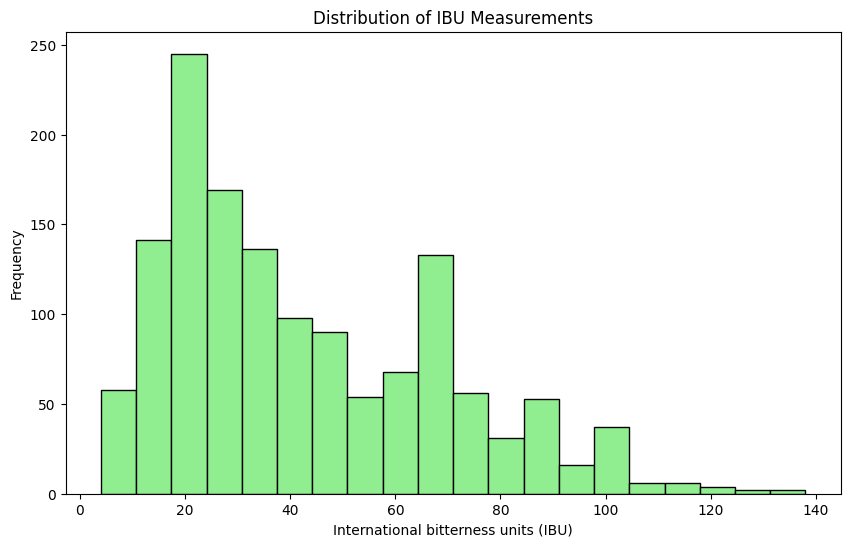

In [21]:
plt.figure(figsize = (10, 6))

plt.hist(df["IBUs"], 
         bins=20, 
         color= "lightgreen", 
         edgecolor = 'black')

plt.title("Distribution of IBU Measurements")
plt.xlabel("International bitterness units (IBU)")
plt.ylabel("Frequency")

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [22]:
thrdq = df["IBUs"].quantile(0.75)
print(thrdq)
df[df["IBUs"] > thrdq]

64.0


,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


## List all of the beers with IBUs below the 25th percentile

In [23]:
firstq = df["IBUs"].quantile(0.25)
print(firstq)
df[df["IBUs"] < firstq]

21.0


,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [86]:
medibu = df.groupby("Style")["IBUs"].median().reset_index()
medibu = medibu.fillna(0)
medibu = medibu.sort_values(by = "IBUs", ascending = True, na_position = "last")

medibu = medibu[medibu["Style"] != 0]

<BarContainer object of 99 artists>

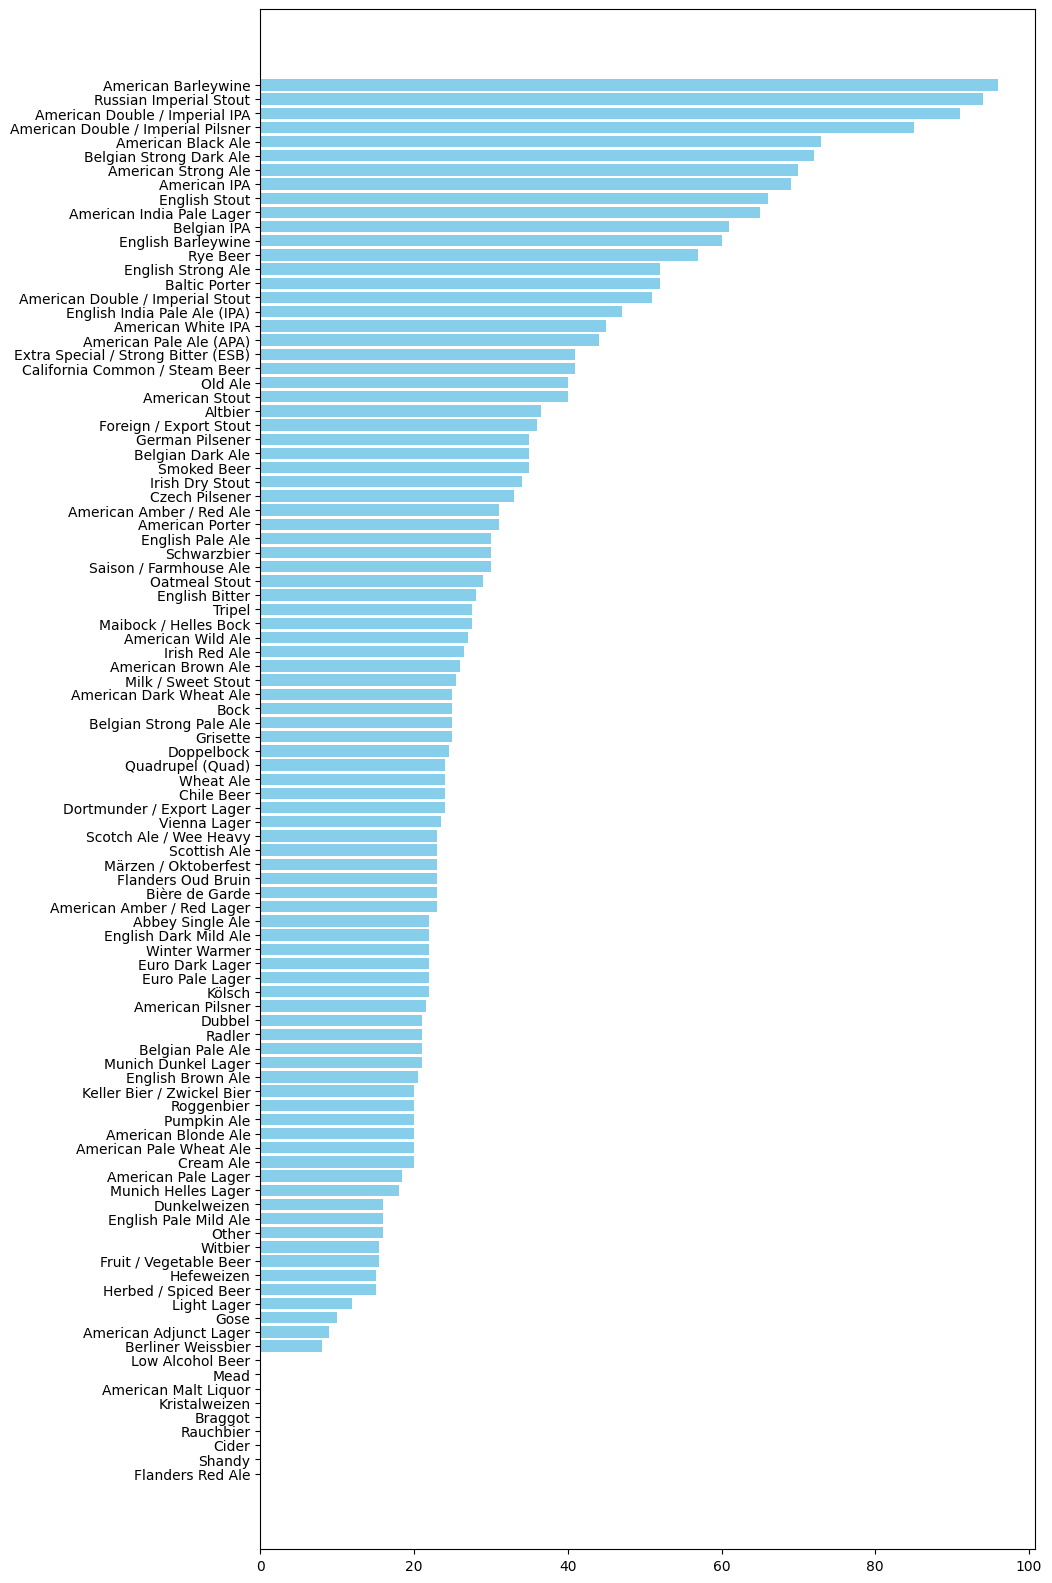

In [87]:
plt.figure(figsize=(10, 20))

plt.barh(medibu["Style"],
         medibu["IBUs"], 
         color = 'skyblue')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [25]:
# LOW IBU
frst = df[df["IBUs"] < firstq]
frst.value_counts().head(5).reset_index()  

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State,count
0,Nonstop Hef Hop,Hopworks Urban Brewery,"Portland, OR",American Pale Wheat Ale,16 oz.,3.9,20.0,OR,12
1,Point Special,Stevens Point Brewery,"Stevens Point, WI",American Adjunct Lager,12 oz.,4.7,9.0,WI,2
2,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,"San Francisco, CA",Fruit / Vegetable Beer,12 oz.,4.9,17.0,CA,2
3,Morning Wood Wheat (Current),Pug Ryan's Brewery,"Dillon, CO",American Pale Wheat Ale,12 oz.,5.9,14.0,CO,2
4,Barney Flats Oatmeal Stout,Anderson Valley Brewing Company,"Boonville, CA",Oatmeal Stout,12 oz.,5.7,13.0,CA,2


In [26]:
# HIGH IBU
thrd = df[df["IBUs"] > thrdq]
thrd.value_counts().head(5).reset_index()

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State,count
0,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.5,65.0,CO,3
1,Dagger Falls IPA,Sockeye Brewing Company,"Boise, ID",American IPA,12 oz.,6.3,100.0,ID,3
2,Modus Hoperandi,Ska Brewing Company,"Durango, CO",American IPA,12 oz.,6.8,65.0,CO,2
3,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.0,120.0,VT,2
4,Hop Slayer Double IPA (2011),Wild Onion Brewing Company,"Lake Barrington, IL",American Double / Imperial IPA,12 oz.,8.2,100.0,IL,2


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [27]:
# wheat beer styles
wheatbs = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]

# Filter for wheat beerw
wheatbeer = df[df["Style"].isin(wheatbs)]
# wheatbeer

# Average IBU of wheat beers
print("Average IBU of wheat beers is", round(wheatbeer["IBUs"].mean(),1))

Average IBU of wheat beers is 19.0


## Draw a histogram of the IBUs of those beers

Text(0, 0.5, 'Frequency')

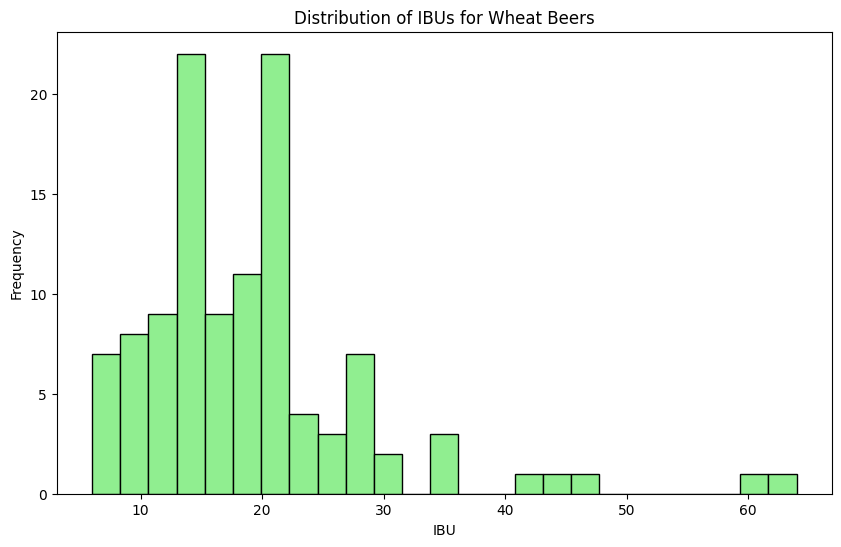

In [28]:
# Plot histogram of IBUs for wheat beers

plt.figure(figsize = (10, 6))

plt.hist(wheatbeer["IBUs"], bins = 25, color= "lightgreen", edgecolor = "black")
plt.title("Distribution of IBUs for Wheat Beers")
plt.xlabel("IBU")
plt.ylabel("Frequency")

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

Average IBU for IPAs is 70.0


Text(0, 0.5, 'Frequency')

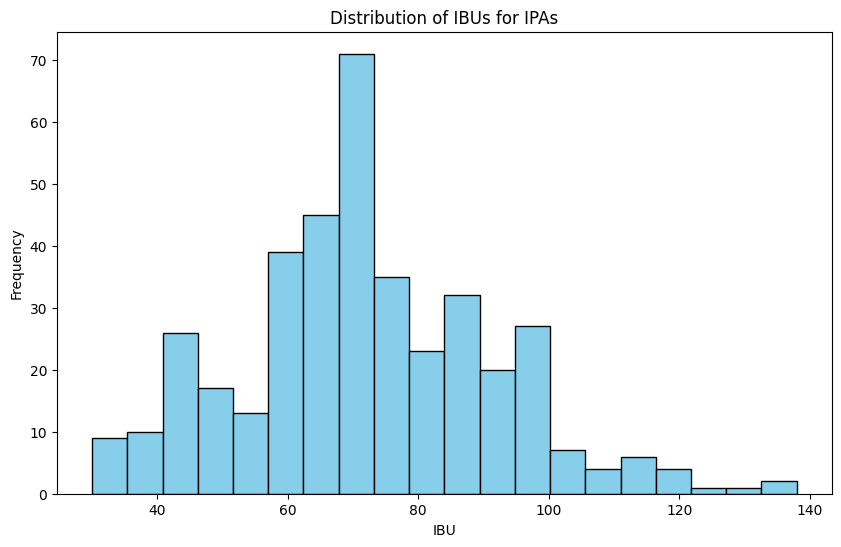

In [29]:
ipas.head()
ipas.shape

print("Average IBU for IPAs is", ipas["IBUs"].median())
      
plt.figure(figsize=(10, 6))

plt.hist(ipas["IBUs"], bins = 20, color = "skyblue", edgecolor = "black")

plt.title("Distribution of IBUs for IPAs")
plt.xlabel("IBU")
plt.ylabel("Frequency")

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

Text(0, 0.5, 'Frequency')

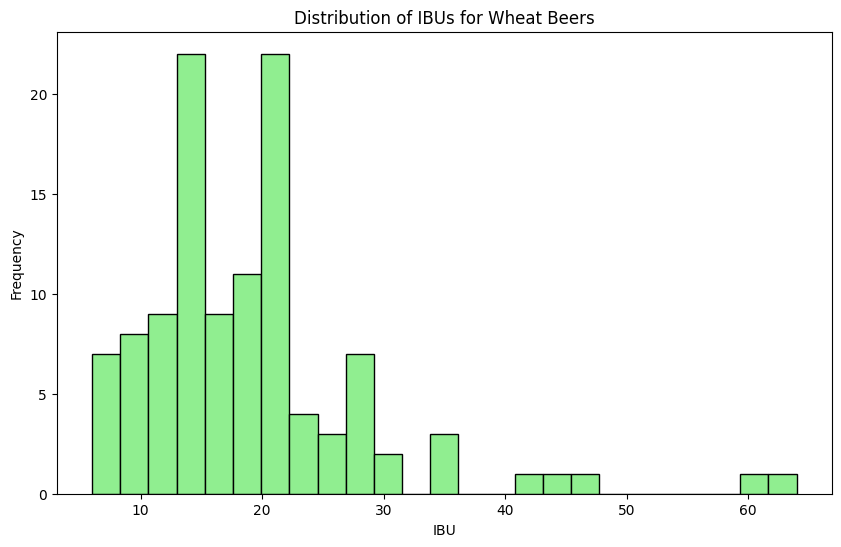

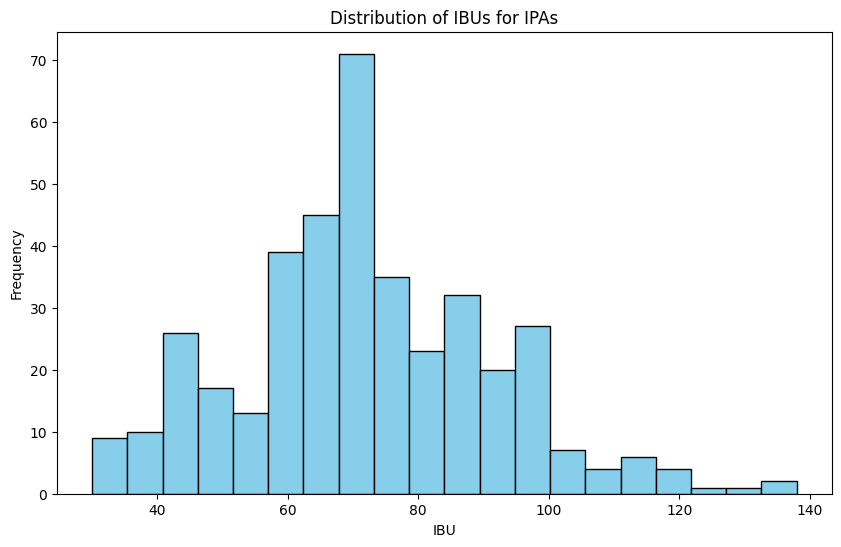

In [30]:
# PLOT 1
plt.figure(figsize = (10, 6))
plt.hist(wheatbeer["IBUs"], bins = 25, color= "lightgreen", edgecolor = "black")
plt.title("Distribution of IBUs for Wheat Beers")
plt.xlabel("IBU")
plt.ylabel("Frequency")


# PLOT 2
plt.figure(figsize=(10, 6))
plt.hist(ipas["IBUs"], bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Distribution of IBUs for IPAs")
plt.xlabel("IBU")
plt.ylabel("Frequency")

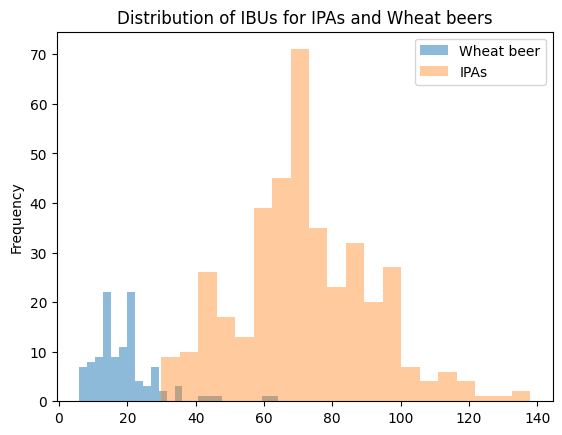

In [98]:
from matplotlib import pyplot
pyplot.hist(wheatbeer["IBUs"], bins = 25,  alpha = 0.5, label = "Wheat beer")
pyplot.hist(ipas["IBUs"], bins = 20,  alpha = 0.4, label = "IPAs")
plt.title("Distribution of IBUs for IPAs and Wheat beers")
plt.ylabel("Frequency")
pyplot.legend(loc='upper right')

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [31]:
print("Average ABV for wheat beers is", round(wheatbeer["ABV"].mean(),1))

Average ABV for wheat beers is 5.0


In [32]:
print("Average ABV for IPAs is", round(ipas["ABV"].mean(),1))

Average ABV for IPAs is 6.9


Text(0, 0.5, 'Frequency')

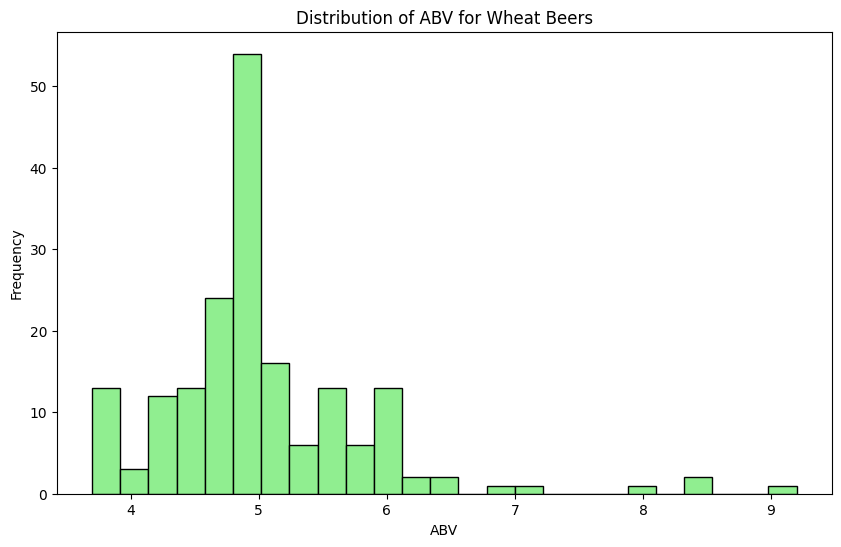

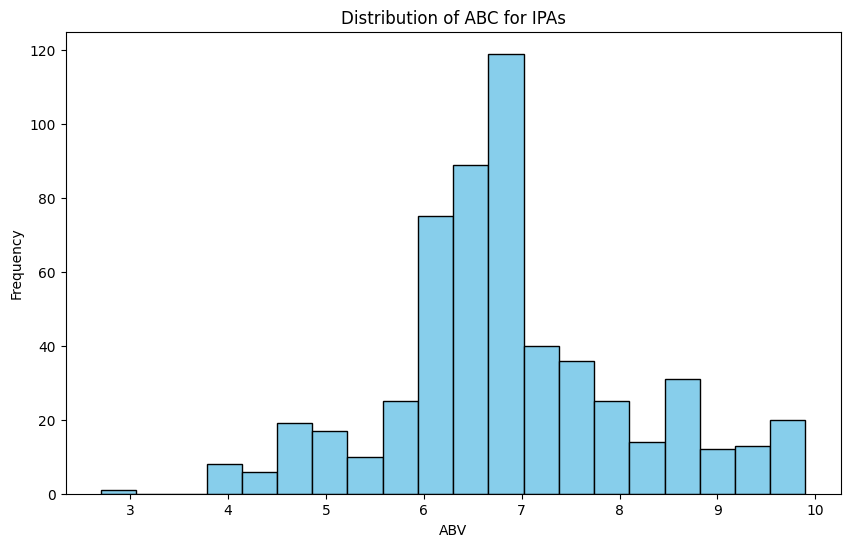

In [33]:
# PLOT 1
plt.figure(figsize = (10, 6))
plt.hist(wheatbeer["ABV"], bins = 25, color= "lightgreen", edgecolor = "black")
plt.title("Distribution of ABV for Wheat Beers")
plt.xlabel("ABV")
plt.ylabel("Frequency")


# PLOT 2
plt.figure(figsize=(10, 6))
plt.hist(ipas["ABV"], bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Distribution of ABC for IPAs")
plt.xlabel("ABV")
plt.ylabel("Frequency")


## Good work!

# 🍻🍻🍻🍻🍻🍻